<a href="https://colab.research.google.com/github/Reece323/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/!!!!NEW!!!!_Cody_Reece_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd

In [0]:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa = pd.read_csv(source_url)

In [6]:
#First few rows
iowa.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1322,1323,60,RL,107.0,10186,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,674,Unf,0,76,750,GasA,...,Y,SBrkr,1061,862,0,1923,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,RFn,2,564,TA,TA,Y,240,39,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000


In [7]:
iowa.shape

(1460, 81)

In [8]:
iowa[['YearBuilt', 'MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [9]:
pd.set_option('display.max_rows', 100)
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [10]:
#PREFERRED METHOD!!!
#Data type of SPECIFIC column
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [11]:
#Another way for Data type of SPECIFIC column
#NOT RECOMMENDED
iowa.Fireplaces.sample(4)

1358    0
1160    1
648     1
401     1
Name: Fireplaces, dtype: int64

In [12]:
# iowa['BedroomAbvGr'].head(10)
iowa['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [13]:
###MISSING VALUES SHOW UP AS FLOATS! (NaN)

iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [14]:
#NaN is the most common value
#NUMPY is most helpful for this
import numpy as np
np.nan

nan

In [15]:
type(np.nan)

float

In [16]:
iowa['LotFrontage'].isnull().sum()

259

In [17]:
#How big before dropping NaN
iowa.shape

(1460, 81)

In [0]:
### DROPS MISSING DATA (NaN)
iowa['LotFrontage'].dropna(inplace=True)

In [19]:
iowa.shape

(1460, 81)

In [20]:
iowa['LotFrontage'].isnull().sum()

0

#Making Features
##TotalBsmtSF
##1stFlrSF
##2ndFlrSF
##SalePrice1

In [25]:
#Smaller dataframe.. Few specific columns
#by passing a list of column headers inside 
small=iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
272,1152,1164,1106,290000
649,630,630,0,84500
141,1734,1734,0,260000


In [32]:
#Add all square footage to get a single square footage column for the entire dataset
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,1710,856,854,208500,3420
1,1262,1262,0,181500,2524
2,1786,920,866,223500,3572
3,1717,961,756,140000,3434
4,2198,1145,1053,250000,4396


In [33]:
small['PricePerSf'] = small['SalePrice'] / small['TotalSF']
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSf
1101,950,950,0,119500,1900,62.894737
307,1406,1035,371,89500,2812,31.827881
1253,2167,1516,651,294000,4334,67.835718
1346,2156,2156,0,262500,4312,60.876623
711,1178,859,319,102776,2356,43.623090


In [34]:
## Crosstab
#Categorical variables
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [38]:
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
206,IR1,NaN,Pave,Normal
1057,IR2,NaN,Pave,Normal
841,Reg,Grvl,Pave,Normal
1090,Reg,NaN,Pave,Normal
1266,IR1,NaN,Pave,Normal


In [39]:
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [41]:
##Prefered only for BINARY!!!!

iowa['NormalCondition'] = np.where(iowa['SaleCondition'] == 'Normal', 'yes', "no")
iowa['NormalCondition'].value_counts()

yes    1198
no      262
Name: NormalCondition, dtype: int64

In [42]:
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [44]:
#Trim from 4 to 3
iowa['LotShape3'] = iowa['LotShape'].map({'Reg' : 'Regular', 'IR1' : 'Irregular', 'IR2' : 'Other', 'IR3' : 'Other'})
iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [45]:
#more value counts 
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [50]:
# Multiple categorical variables lumping together
# Replace using .loc

iowa['top_neighbors'] = 'All Others'
iowa[['top_neighbors', 'Neighborhood']].head()


,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [58]:
# STEP 2: remap just the ones i want.. using .loc
iowa.loc[iowa['Neighborhood'] == 'NAmes', 'top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)


,top_neighbors,Neighborhood
469,All Others,SawyerW
1315,North Ames,NAmes
61,All Others,IDOTRR
745,All Others,NWAmes
1437,All Others,NridgHt
285,All Others,Somerst
530,All Others,Timber
165,All Others,Edwards
1454,All Others,Somerst
1122,All Others,Edwards


In [60]:
#Multiple times
iowa.loc[iowa['Neighborhood'] == 'CollgCr', 'top_neighbors'] = 'College Circle'
iowa.loc[iowa['Neighborhood'] == 'Gilbert', 'top_neighbors'] = 'Favorite Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Somerst', 'top_neighbors'] = 'Favorite Neighborhood'

iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
410,All Others,Edwards
606,College Circle,CollgCr
74,All Others,OldTown
707,All Others,NridgHt
93,All Others,OldTown
724,All Others,Edwards
1187,All Others,NoRidge
1291,All Others,BrDale
215,North Ames,NAmes
687,Favorite Neighborhood,Somerst


In [61]:
iowa['top_neighbors'].value_counts()

All Others               920
North Ames               225
Favorite Neighborhood    165
College Circle           150
Name: top_neighbors, dtype: int64

In [63]:
#Crosstab!
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3']) 

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [67]:
# Margins
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [70]:
# as proportions
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize= 'index', margins=True)
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize= 'columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


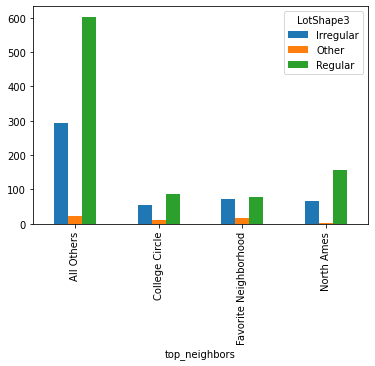

In [71]:
# display that

myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar');

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01